# Assignment 4: PCA

## sh2432

Due: Thursday, October 24 at midnight

In this assignment you'll gain some hands-on experience with principal components analysis (PCA).

The assignment has three problems. The first problem investigates PCA and linear regression on a simple toy data set. The second two problems use the MNIST and Fashion MNIST data, and the database of faces that we began looking at during last week's lectures. In the second problem, you will study how different numbers of principal components represent the images visually. For third problem you will use logistic regression to predict the class label of images using the principal components representation of the images, and examine how the classification error changes with the number of principal components used. 

For the second two problems, once you get your code to work on MNIST, it should be straightforward to just copy paste the code and then run it on Fashion MNIST and the face data. 

Please submit your notebook and pdf (from html) following the usual instructions.



## Problem 1: Principal components and Least squares

In least-squares regression one of the assumptions made is that the explanatory variable(s) are non-random and contain no measurement error. Therefore, the size of the residuals (vertical distances between each observed values of the response variable and the line) completely characterize the loss due to a given line. However, it is often the case that explanatory variables do have some randomness in them, in which case we may wish to characterize the loss with the orthogonal distances between data points and the line. This can be done with what is called Principal Component Regression, which you will have some time to use in this problem.

## Part (a)

The cell below simulates two indepndent random variables, each from a Normal distribution with mean $0$. It then rotates the data by an angle $\dfrac{\pi}{3}$. What is the slope and intercept of a horizontal line after it has been rotated about the origin by $\dfrac{\pi}{3}$ radians? Add a line with this slope and intercept to the plot generated in the following cell.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

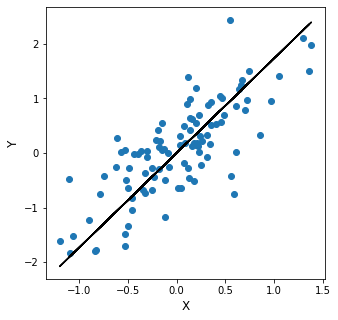

In [2]:
np.random.seed(10)
X = np.vstack((np.random.normal(0, 1, size=100), np.random.normal(0, 0.3, size=100))).T

theta = np.pi/3
R = np.array([np.cos(theta), np.sin(theta), -np.sin(theta), np.cos(theta)]).reshape(2,2)
X = np.dot(X, R)
plt.figure(figsize=(5,5))
plt.scatter(np.array(X[:,0]), np.array(X[:,1]))
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)

x=np.array(X[:,0]).reshape(100,1)
y=np.array(X[:,1])
plt.plot(x, x * np.tan(theta), '-', color='black')

plt.show()

In [3]:
np.tan(theta) #slope

1.7320508075688767

The slope is 1.732 and the intercept is 0 after it has been rotated about the origin by $\dfrac{\pi}{3}$ radians

## Part (b)

Use least-squares regression to fit a line (with a slope and intercept) to the data generated above. Create a plot that displays the data, the true line, and the least-squares regression line. Be sure to label the two lines with legends in your plot!

You could use `statsmodels.api.OLS` to fit the "ordinary least-squares" regression, or any other function of your choice.


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     154.2
Date:                Thu, 24 Oct 2019   Prob (F-statistic):           7.85e-22
Time:                        22:10:01   Log-Likelihood:                -79.533
No. Observations:                 100   AIC:                             163.1
Df Residuals:                      98   BIC:                             168.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0517      0.054      0.954      0.3

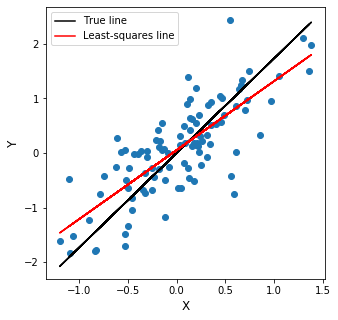

In [4]:
#linear regression model
results = sm.OLS(y,sm.add_constant(x)).fit()
print (results.summary())
plt.figure(figsize=(5,5))
plt.scatter(np.array(X[:,0]), np.array(X[:,1]))
plt.plot(x, x * np.tan(theta), '-', color='black', label='True line')
plt.plot(x, results.params[0] + results.params[1] * x, '-', color='r', label='Least-squares line')
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.legend()
plt.show()

## Part (c)

Now fit a line to the data by projecting onto the first principal component. What is the slope of the line created by the first principal component, and how does it relate to the true slope? Create a plot with all three lines, including those you constructed in parts (a) and (b). 

The slope of the PCA line created by the first principal component is 1.823 which is close to the true slope 1.732.

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
pcs = pca.fit_transform(X)

principal_vectors = pca.components_  
principal_components = pcs
X_new = pca.inverse_transform(pcs)

print("PCA principal vectors", principal_vectors)
print("PCA variance explained", pca.explained_variance_)

print("original shape: ", X.shape)
print("transformed shape:", pcs.shape)

PCA principal vectors [[0.4808908 0.8767805]]
PCA variance explained [0.94502357]
original shape:  (100, 2)
transformed shape: (100, 1)


In [7]:
slope=principal_vectors[0,1]/principal_vectors[0,0]
slope

1.8232423930763275

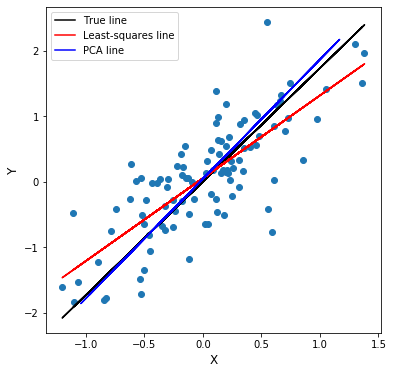

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(np.array(X[:,0]), np.array(X[:,1]))
plt.plot(x, x * np.tan(theta),'-', color='black', label='True line')
plt.plot(x, results.params[0] + results.params[1] * x, '-', color='r', label='Least-squares line')
plt.plot(X_new[:, 0], X_new[:, 1], color='blue', label='PCA line')
plt.xlabel("X", fontsize=12)
plt.ylabel("Y", fontsize=12)
plt.legend();

## Part (d)

Explain why least-squares regression and principal components analysis give different fits to the data in part (c)? 
Can you say that one fit is better than the other?

The PCA line fits better. It is closer to the true line than the regression line. 

Least-squares regression tries to find a best fit line through the data points by minimizing the vertical distances based on the Least Squares method. 

PCA tries to find a best fit line through the data points but it minimizes the orthogonal distance to the model line.

(reference: https://shankarmsy.github.io/posts/pca-vs-lr.html#sthash.21t4pkv7.dpuf)

## Problems 2 and 3: MNIST and  Fashion MNIST data


For the next two problems you will need the MNIST and Fashion MNIST data. You can download these data sets here:

MNIST   http://yann.lecun.com/exdb/mnist/<br>
FASHION-MNIST    https://github.com/zalandoresearch/fashion-mnist/tree/master/data/fashion

Download the following files:<br>
train-images-idx3-ubyte.gz<br>
train-labels-idx1-ubyte.gz<br>
t10k-images-idx3-ubyte.gz<br>
t10k-labels-idx1-ubyte.gz

To run the code, put the data in directories named `mnist` and `fashion-mnist` within the same directory as this notebook. 

### The following "helper functions" should be used to read in the MNIST and Fashion MNIST datasets.

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import os, gzip

def load_data(dataset_name):
    data_dir = os.path.join("./", dataset_name)
        
    def extract_data(filename, num_data, head_size, data_size):
        with gzip.open(filename) as bytestream:
            bytestream.read(head_size)
            buf = bytestream.read(data_size * num_data)
            data = np.frombuffer(buf, dtype=np.uint8).astype(np.float)
        return data

    data = extract_data(data_dir + '/train-images-idx3-ubyte.gz', 60000, 16, 28 * 28)
    trX = data.reshape((60000, 28, 28))

    data = extract_data(data_dir + '/train-labels-idx1-ubyte.gz', 60000, 8, 1)
    trY = data.reshape((60000))

    data = extract_data(data_dir + '/t10k-images-idx3-ubyte.gz', 10000, 16, 28 * 28)
    teX = data.reshape((10000, 28, 28))

    data = extract_data(data_dir + '/t10k-labels-idx1-ubyte.gz', 10000, 8, 1)
    teY = data.reshape((10000))

    trY = np.asarray(trY)
    teY = np.asarray(teY)

    X = np.concatenate((trX, teX), axis=0)
    y = np.concatenate((trY, teY), axis=0).astype(np.int)

    seed = 409
    np.random.seed(seed)
    np.random.shuffle(X)
    np.random.seed(seed)
    np.random.shuffle(y)
    return X / 255., y    

# Problem 2: PCA for Dimension Reduction

In this problem you will approximately reconstruct images by simplifying them to multiples of a few principal components.

Note: When you display the images, use the color map `cmap=plt.cm.gray.reversed()` for MNIST and Fashion MNIST and use `cmap=plt.cm.gray` for the face data

## Part (a)

Pick a random seed in the next cell to select a random image of a handwritten $0$ from the MNIST data.

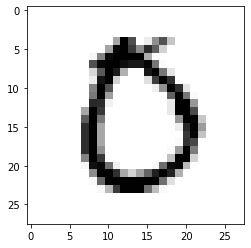

In [10]:
x, y = load_data('mnist')
x = x.reshape([70000, 28*28])
zeros = np.where(y==0)[0]
x = x[zeros,:]
y = y[zeros]
np.random.seed(10) # put your seed here
my_image = np.random.randint(0, len(y), size=1)

plt.imshow(x[my_image,:].reshape((28,28)), cmap=plt.cm.gray.reversed())

For $k = 0, 10, 20, ...,100$, use $k$ principal components for MNIST $0$'s to approximately reconstruct the image selected above. Display the reconstruction for each value of $k$. To display the set of images compactly, you may want to use subplot, as shown in the starter code for Problem 3(b) below.

In [11]:
images = x[(y==0), :]
avgimg = images.mean(0)
#_ = plt.imshow(avgimg.reshape((28, 28)), cmap=plt.cm.gray.reversed())

In [12]:
cimages = np.subtract(images, avgimg)
#_ = plt.imshow(cimages[0].reshape((28, 28)), cmap=plt.cm.gray.reversed())
#_ = plt.imshow(np.add(cimages[0], avgimg).reshape((28, 28)), cmap=plt.cm.gray.reversed())

In [13]:
#supress the warnings
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore') 

Variance explained by first 0 principal vectors: 0.00%
Variance explained by first 10 principal vectors: 62.66%
Variance explained by first 20 principal vectors: 75.82%
Variance explained by first 30 principal vectors: 81.89%
Variance explained by first 40 principal vectors: 85.60%
Variance explained by first 50 principal vectors: 88.03%
Variance explained by first 60 principal vectors: 89.82%
Variance explained by first 70 principal vectors: 91.22%
Variance explained by first 80 principal vectors: 92.33%
Variance explained by first 90 principal vectors: 93.23%
Variance explained by first 100 principal vectors: 94.01%


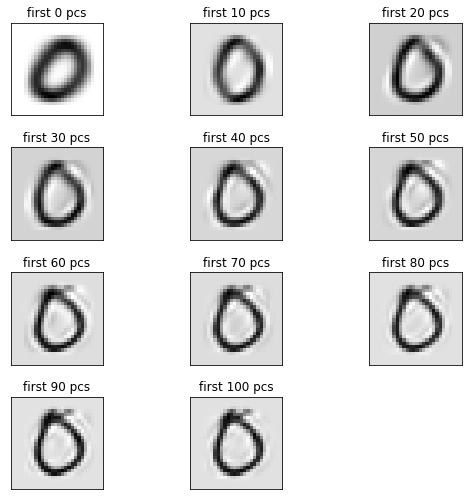

In [14]:
plt.figure(figsize=(1.8 * 4, 2.4 * 3))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
i=0
for k in range(0,101,10): 
    pca = PCA(n_components=k).fit(cimages)
    principal_vectors = pca.components_
    principal_vectors = principal_vectors.reshape((k, 28, 28))
    pcs = pca.fit_transform(cimages)
    capprox = pca.inverse_transform(pcs)
    approx = np.add(capprox, avgimg)
    
    i=i+1
    plt.subplot(4, 3, i)
    plt.title('first %d pcs' %k)
    plt.imshow(approx[my_image,:].reshape((28, 28)), cmap=plt.cm.gray.reversed())
    plt.xticks(())
    plt.yticks(())

    ratio = pca.explained_variance_ratio_.sum()
    print('Variance explained by first %d principal vectors: %.2f%%' % (k, ratio*100))

With the increase of k, the variance increases and the reconstruction sample image gets more clear and closer to its orignial figure.

## Part (b)

Repeat Part (a), but this time for the dresses in the Fashion-MNIST dataset.

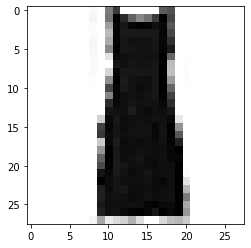

In [15]:
x, y = load_data('fashion-mnist')
x = x.reshape([70000, 28*28])
zeros = np.where(y==3)[0]
x = x[zeros,:]
y = y[zeros]
np.random.seed(10) #put your seed here
my_image = np.random.randint(0, len(y), size=1)

plt.imshow(x[my_image,:].reshape((28,28)), cmap=plt.cm.gray.reversed())

In [16]:
images = x[(y==3), :]
avgimg = images.mean(0)
#_ = plt.imshow(avgimg.reshape((28, 28)), cmap=plt.cm.gray.reversed())

In [17]:
cimages = np.subtract(images, avgimg)
#_ = plt.imshow(cimages[0].reshape((28, 28)), cmap=plt.cm.gray.reversed())
#_ = plt.imshow(np.add(cimages[0], avgimg).reshape((28, 28)), cmap=plt.cm.gray.reversed())

Variance explained by first 0 principal vectors: 0.00%
Variance explained by first 10 principal vectors: 67.50%
Variance explained by first 20 principal vectors: 76.36%
Variance explained by first 30 principal vectors: 80.92%
Variance explained by first 40 principal vectors: 83.82%
Variance explained by first 50 principal vectors: 85.94%
Variance explained by first 60 principal vectors: 87.58%
Variance explained by first 70 principal vectors: 88.85%
Variance explained by first 80 principal vectors: 89.87%
Variance explained by first 90 principal vectors: 90.79%
Variance explained by first 100 principal vectors: 91.58%


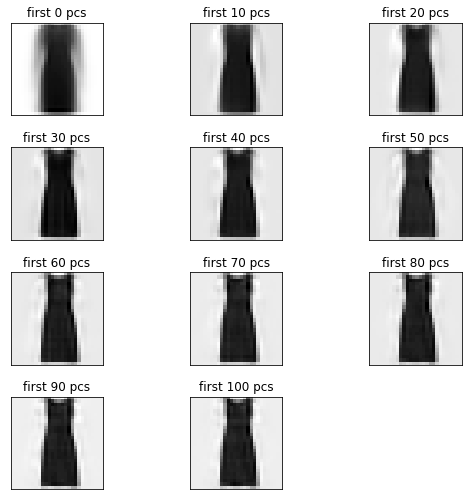

In [18]:
plt.figure(figsize=(1.8 * 4, 2.4 * 3))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
i=0
for k in range(0,101,10): 
    pca = PCA(n_components=k).fit(cimages)
    principal_vectors = pca.components_
    principal_vectors = principal_vectors.reshape((k, 28, 28))
    pcs = pca.fit_transform(cimages)
    capprox = pca.inverse_transform(pcs)
    approx = np.add(capprox, avgimg)
    
    i=i+1
    plt.subplot(4, 3, i)
    plt.title('first %d pcs' %k)
    plt.imshow(approx[my_image,:].reshape((28, 28)), cmap=plt.cm.gray.reversed())
    plt.xticks(())
    plt.yticks(())

    ratio = pca.explained_variance_ratio_.sum()
    print('Variance explained by first %d principal vectors: %.2f%%' % (k, ratio*100))#

With the increase of k, the variance increases and the reconstruction sample image gets more clear and closer to its orignial figure.

## Part (c)

Do the same thing as in Parts (a) and (b), this time reconstructing an image of Gerhard Schroeder.

In [19]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target
height, width = (50, 37)
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

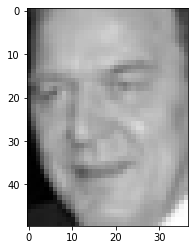

In [20]:
x = lfw_people.data
y = lfw_people.target
zeros = np.where(y==4)[0]
x = x[zeros,:]
y = y[zeros]
np.random.seed(10) #put your seed here
my_image = np.random.randint(0, len(y), size=1)

plt.imshow(x[my_image,:].reshape((50,37)), cmap=plt.cm.gray)#, cmap=plt.cm.gray.reversed())

In [21]:
images = x[(y==4), :]
avgimg = images.mean(0)
#_ = plt.imshow(avgimg.reshape((50, 37)), cmap=plt.cm.gray)

In [22]:
cimages = np.subtract(images, avgimg)
#_ = plt.imshow(cimages[0].reshape((50, 37)), cmap=plt.cm.gray)
#_ = plt.imshow(np.add(cimages[0], avgimg).reshape((50, 37)), cmap=plt.cm.gray)

Variance explained by first 0 principal vectors: 0.00%
Variance explained by first 10 principal vectors: 70.72%
Variance explained by first 20 principal vectors: 82.74%
Variance explained by first 30 principal vectors: 88.85%
Variance explained by first 40 principal vectors: 92.46%
Variance explained by first 50 principal vectors: 94.87%
Variance explained by first 60 principal vectors: 96.55%
Variance explained by first 70 principal vectors: 97.77%
Variance explained by first 80 principal vectors: 98.67%
Variance explained by first 90 principal vectors: 99.32%
Variance explained by first 100 principal vectors: 99.76%


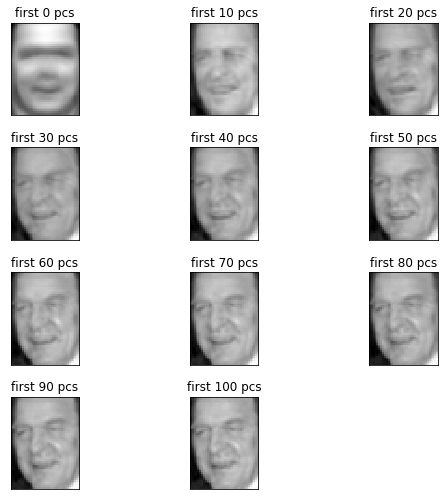

In [23]:
plt.figure(figsize=(1.8 * 4, 2.4 * 3))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
i=0
for k in range(0,101,10): 
    pca = PCA(n_components=k).fit(cimages)
    principal_vectors = pca.components_
    principal_vectors = principal_vectors.reshape((k, 50, 37))
    pcs = pca.fit_transform(cimages)
    capprox = pca.inverse_transform(pcs)
    approx = np.add(capprox, avgimg)
    
    i=i+1
    plt.subplot(4, 3, i)
    plt.title('first %d pcs' %k)
    plt.imshow(approx[my_image,:].reshape((50, 37)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

    ratio = pca.explained_variance_ratio_.sum()
    print('Variance explained by first %d principal vectors: %.2f%%' % (k, ratio*100))#

With the increase of k, the variance increases and the reconstruction sample image gets more clear and closer to its orignial figure.

# Problem 3: PCA for Classification

## Part (a)

Load in the MNIST data with the labels as `y` and the images as `x` by running the next cell. Create a subset of the data by keeping only the images that have the label of either $4$ or $9$. Use Principal Components Analysis (PCA) to project the data onto the first two principal components, and create a plot of the projected data color-coded by the label. Does the plot make sense? Explain in a couple sentences.

In [24]:
from sklearn.linear_model import LogisticRegression

x, y = load_data('mnist')
x = x.reshape([70000, 28*28])

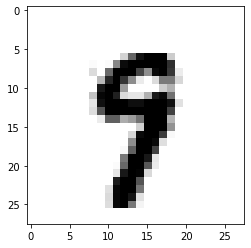

In [25]:
keep = np.where((y==4) | (y==9))[0]

x = x[keep,:]
y = y[keep]
np.random.seed(10) #put your seed here
my_image = np.random.randint(0, len(y), size=1)

plt.imshow(x[my_image,:].reshape((28,28)), cmap=plt.cm.gray.reversed())

In [26]:
avgimg= x.mean(0)
cimages = np.subtract(x, avgimg)

In [27]:
#PCA Projection to 2D
pca = PCA(2).fit(cimages)  # project from 784 to 2 dimensions
projected = pca.fit_transform(cimages)
print(x.shape)
print(projected.shape)

(13782, 784)
(13782, 2)


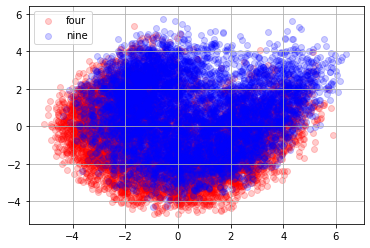

In [28]:
targets = ['four', 'nine']
colors = ['r','b']
for i, target, color in zip(y, targets,colors):
    plt.scatter(projected[y==i, 0], projected[y==i, 1]
               , c = color
               , alpha=0.2)
plt.legend(targets)
plt.grid()

The plot makes sense because we see some separation between digits 4 and digits 9. However, there are a lot of overlap in between, which indicates that 4's and 9's cannot be completely distinguished using the first two principal components.

## Part (b)

Why not use more principal components! For $k = 2,3,4,...,15$, use PCA to project the data onto $k$ principal components. For each $k$, use logistic regression to build a model to classify images as $4$ or $9$, and calculate the misclassification rate. Create a plot of misclassification rate as a function of $k$, the number of principal components used. Does the plot make sense? Explain.

In [29]:
import statsmodels.api as sm
#ref: https://acadgild.com/blog/logistic-regression-with-pca-algorithm 

In [30]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

#generate a function to calculate error rate
def error_rt(k):
    pca = PCA(n_components=k).fit(cimages)
    pcs = pca.fit_transform(cimages)
    reg = logisticRegr.fit(pcs, y)
    pred = reg.predict(pcs)
    error = sum(pred != y)/len(y)
    return error

e = np.zeros(14)
for i in range(14):
    k=i+2
    e[i]=error_rt(k)

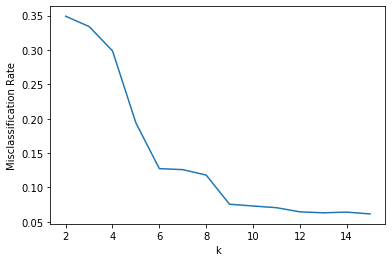

In [31]:
k= np.arange(2, 16, 1)
plt.plot(k, e)
plt.xlabel('k')
plt.ylabel('Misclassification Rate')
plt.show()

It makes sence as the number of principal components increased, the Misclassification Rate decreased. 

## Part (c)

Build a logistic regression model using $10$ principal components. Create a list called `misclass` that lists the indices of all images that were misclassified with this model. Run the cell below to create a visualization of the first $16$ of these images. Does it make sense that these would be hard to classify correctly?

In [32]:
pca = PCA(n_components=10).fit(cimages)
pcs = pca.fit_transform(cimages)
reg = logisticRegr.fit(pcs, y)
pred = pd.DataFrame(reg.predict(pcs))
y1= pd.DataFrame(y)

In [33]:
result= pd.concat([y1, pred], axis=1)
result.columns=(['y','predicted'])
result.loc[result['y'] !=result['predicted'], "n"] =0
result.loc[result['y'] ==result['predicted'], "n"] =1
rate=(len(result['y'])-sum(result["n"]))/len(result['y'])
print("Error rate=", rate)
result.head(n=10)

Error rate= 0.07299375997678131


,y,predicted,n
0,9,9,1.0
1,4,4,1.0
2,9,9,1.0
3,4,4,1.0
4,9,9,1.0
5,4,4,1.0
6,9,9,1.0
7,4,4,1.0
8,9,9,1.0
9,4,4,1.0


In [34]:
misclass = np.where(result['n'] == 0)[0]

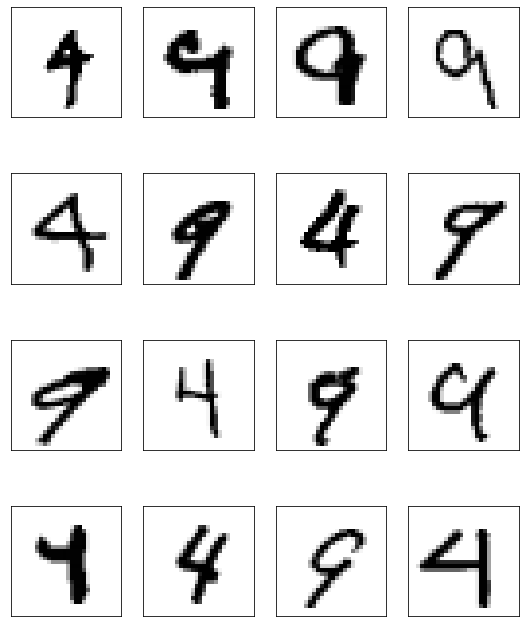

In [35]:
# The following code will display the images that are misclassified

plt.figure(figsize=(1.8 * 4, 2.4 * 4))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x[misclass[i]].reshape((28, 28)), cmap=plt.cm.gray.reversed())
    plt.xticks(())
    plt.yticks(())

It makes sense that these would be hard to classify correctly because the images all look ambiguous.

## Part (d)

Now use the Fashion-MNIST data and train logistic regression models to classify coats ($y=4$) and handbags ($y=8$). Again use $k = 2,3,4,...,15$ to project the data onto $k$ principal components, and calculate the misclassification rate at each $k$. Create a plot of misclassification rate vs. $k$.

In [36]:
x, y = load_data('fashion-mnist')
x = x.reshape([70000, 28*28])

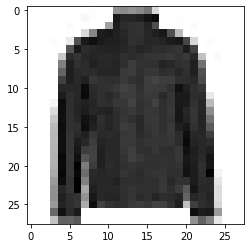

In [37]:
keep = np.where((y==4) | (y==8))[0]

x = x[keep,:]
y = y[keep]
np.random.seed(10) #put your seed here
my_image = np.random.randint(0, len(y), size=1)

plt.imshow(x[my_image,:].reshape((28,28)), cmap=plt.cm.gray.reversed())

In [38]:
avgimg= x.mean(0)
cimages = np.subtract(x, avgimg)

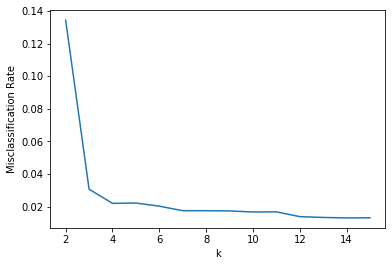

In [39]:
e = np.zeros(14)
for i in range(14):
    k=i+2
    e[i]=error_rt(k)

k= np.arange(2, 16, 1)
plt.plot(k, e)
plt.xlabel('k')
plt.ylabel('Misclassification Rate')
plt.show()

## Part (e)

Follow the same procedure as in Parts (b) and (c) with the faces data instead of MNIST. This time, however, build a model that can classify whether an image is of George W. Bush ($y=3$) someone else. Create a variable that takes the value $1$ when the image is of George W. Bush and $0$ when it is not, and use this to train each Logistic Regression model after projecting onto the first $k$ principal components. Create a plot of misclassification rate as a function of $k$, letting $k$ vary between 2 and 30. Then, show training examples that are misclassified for the $k=30$ model.


In [40]:
from sklearn.datasets import fetch_lfw_people
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
x = lfw_people.data
y = lfw_people.target
height, width = (50, 37)
lfw_people.target_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

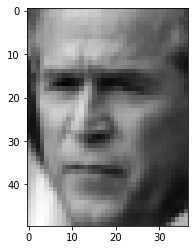

In [41]:
bush = np.where(y==3, 1, 0)

np.random.seed(10) #put your seed here
my_image = np.random.randint(0, len(bush), size=1)
plt.imshow(x[my_image,:].reshape((50,37)), cmap=plt.cm.gray)#, cmap=plt.cm.gray.reversed())

In [42]:
avgimg= x.mean(0)
cimages = np.subtract(x, avgimg)

In [43]:
def error_rt(k):
    pca = PCA(n_components=k).fit(cimages)
    pcs = pca.fit_transform(cimages)
    reg = logisticRegr.fit(pcs, bush)
    pred = reg.predict(pcs)
    error = sum(pred != bush)/len(bush)
    return error

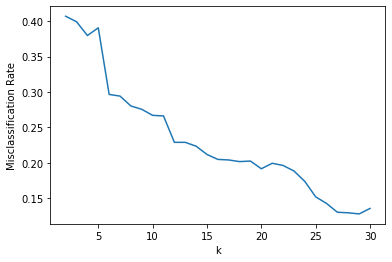

In [44]:
e = np.zeros(29)
for i in range(29):
    k=i+2
    e[i]=error_rt(k)

k= np.arange(2, 31, 1)
plt.plot(k, e)
plt.xlabel('k')
plt.ylabel('Misclassification Rate')
plt.show()

In [45]:
pca = PCA(n_components=30).fit(cimages)
pcs = pca.fit_transform(cimages)
reg = logisticRegr.fit(pcs, bush)
pred = pd.DataFrame(reg.predict(pcs))
y1= pd.DataFrame(bush)

In [46]:
pca = PCA(n_components=30).fit(cimages)
pcs = pca.fit_transform(cimages)
reg = logisticRegr.fit(pcs, bush)
pred = reg.predict(pcs)

misclass = np.where(pred != bush)[0]

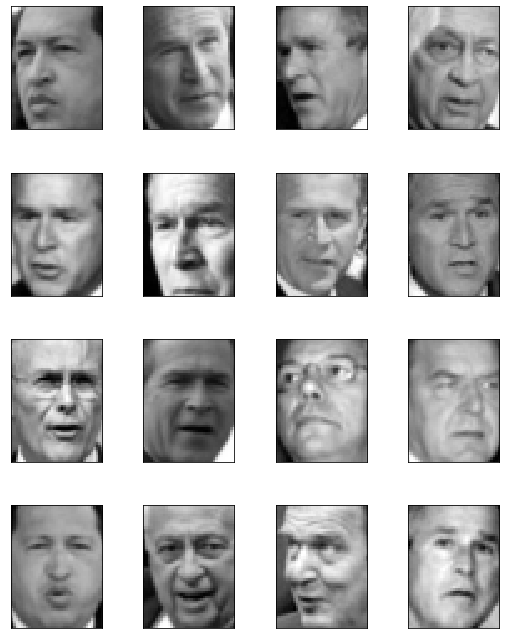

In [47]:
# The following code will display the images that are misclassified

plt.figure(figsize=(1.8 * 4, 2.4 * 4))
plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x[misclass[i]].reshape((50,37)), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())